<a href="https://colab.research.google.com/github/swatiaggrawal/Netflix-Exploratory-Analysis/blob/main/NetflixEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📺 Netflix Exploratory Analysis

---



In [2]:
token = """{
  "username": "swatiagrawal1",
  "key": "XXXXXXXXXX"
}"""

with open('kaggle.json', 'w') as f:
    f.write(token)


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets list


ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025               Spotify Global Music Dataset (2009–2025)               1289021  2025-11-11 09:43:05.933000           6697        148  1.0              
sadiajavedd/students-academic-performance-dataset              Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000          12136        299  1.0              
kundanbedmutha/instagram-analytics-dataset                     Instagram Analytics Dataset                            1090208  2025-11-19 09:28:48.650000           1622         36  1.0              
khush

In [5]:
!kaggle datasets download -d shivamb/netflix-shows


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 940MB/s]


In [6]:
!unzip *.zip


Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [31]:
!pip install wordcloud

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [8]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## ❎Remove Nan Values

In [9]:
df.isnull().sum()
df.fillna("Unknown", inplace=True)


## 🧹Clean the Data

In [18]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')


In [24]:
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(",")[0])


In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows


## 🎬Genre Distribution

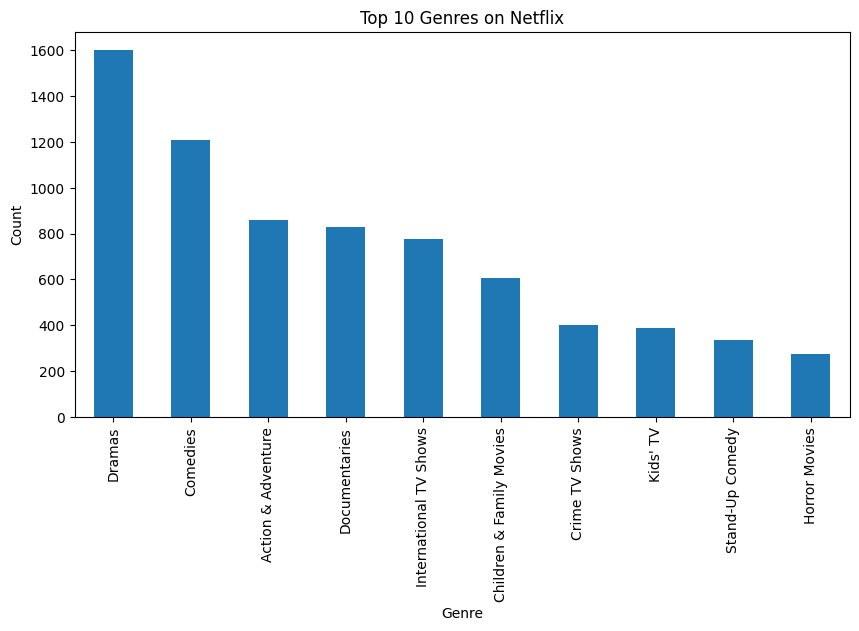

In [26]:
plt.figure(figsize=(10,5))
df['main_genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


## ⌛Content Added Over the Years

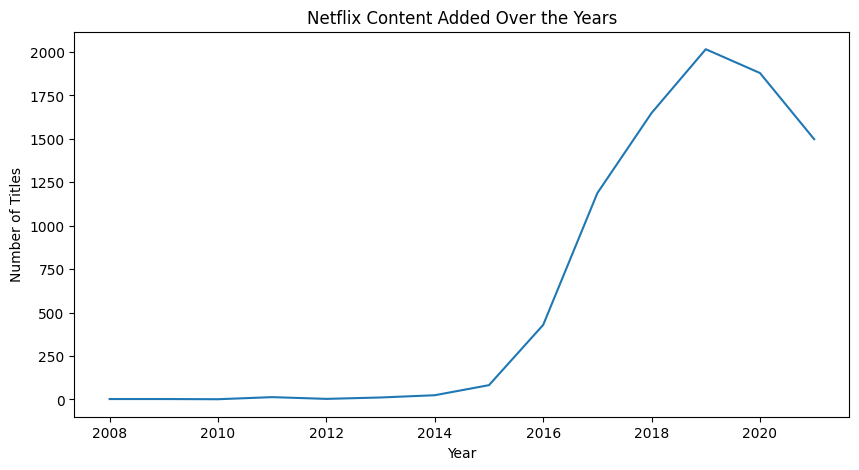

In [27]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(figsize=(10,5))
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


## 🍿Count of Movies vs TV Shows

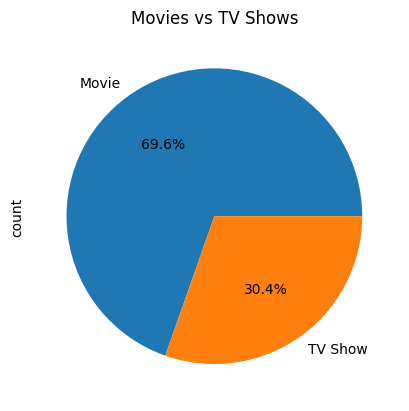

In [28]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Movies vs TV Shows")
plt.show()


## 🌐Top Countries Producing Netflix Content

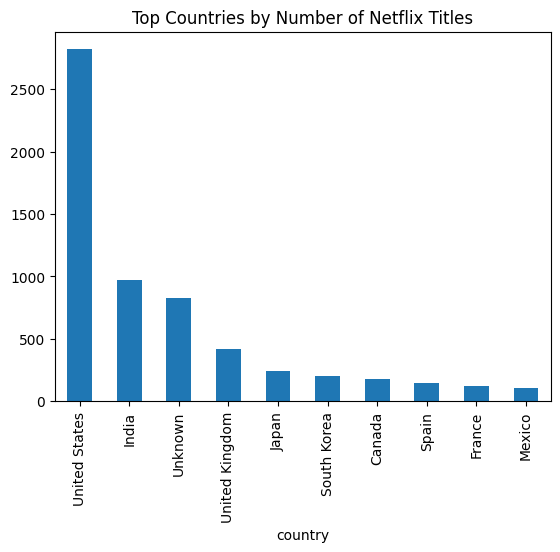

In [29]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top Countries by Number of Netflix Titles")
plt.show()


## 💭Word Cloud of Descriptions

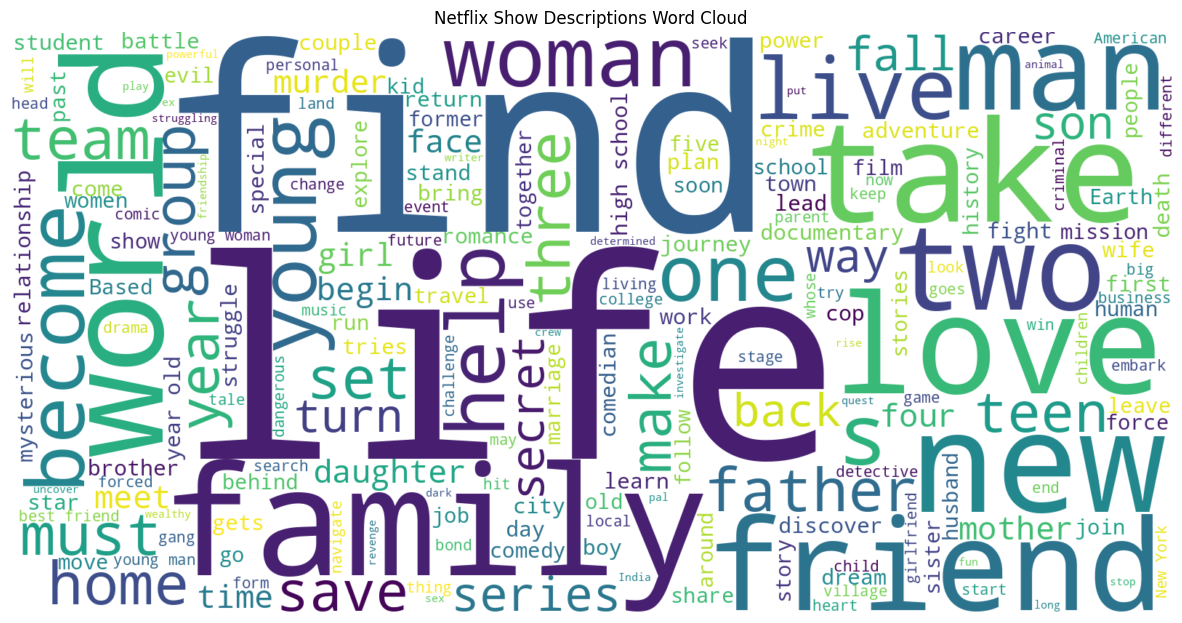

In [34]:
text = " ".join(df['description'].dropna().tolist())

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Netflix Show Descriptions Word Cloud")
plt.show()
